In [411]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score,classification_report, accuracy_score

import seaborn as sns
from matplotlib import pyplot as plt

# LOAD AND EXPLORE THE DATASET
- See KAGGLE dataset here: https://www.kaggle.com/liujiaqi/hr-comma-sepcsv
- This dataset provides 15.000 individual employee records with various information from which to predict whether the employee might quit or not.
- The dataset provides information caracterizing the history, work environment and professional development of the employees such as salary level, workload, recent promotions...In total there are 7 features provided for each employee_id
- In addition to these features, each record indicates whether the employee left the company or not

In [296]:
hr_df = pd.read_csv(r'../datascienceforbusiness-master/hr_data.csv') 
hr_df

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,87670,2,151,3,0,1,0,support,low
14995,87673,2,160,3,0,1,0,support,low
14996,87679,2,143,3,0,1,0,support,low
14997,87681,6,280,4,0,1,0,support,low


- the dataset is complete without missing data

In [297]:
hr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


- Two features are categorical, the others being numerical

In [299]:
categorical_columns = hr_df.select_dtypes(include="object")
categorical_columns.columns

Index(['department', 'salary'], dtype='object')

In [377]:
color_list = sns.cubehelix_palette(start=1, n_colors=6)
color_list

[[0.7742129266850253, 0.898618163798657, 0.8048335114656932],
 [0.6201831589020503, 0.7778209720909514, 0.5894038914248354],
 [0.5169654813082414, 0.6283863323666158, 0.38899728055126487],
 [0.43948012681696463, 0.46331587335022417, 0.23792755413957536],
 [0.3477339317010577, 0.28972843982521357, 0.13578256597646202],
 [0.21126132656158225, 0.13196527359152715, 0.07074286239714389]]

In [382]:
def display_kdeplot(df, feature_1, feature_2, color, j):
    cmap = color
    color_list = sns.cubehelix_palette(start=s[j], n_colors=6)
    sns.kdeplot(x= feature_1 , y= feature_2, data=df, cmap=cmap, shade=True, cut=5, ax=axes[j])
    axes[j].set( title = f'{feature_2}')
    axes[j].set_facecolor(color_list[0])

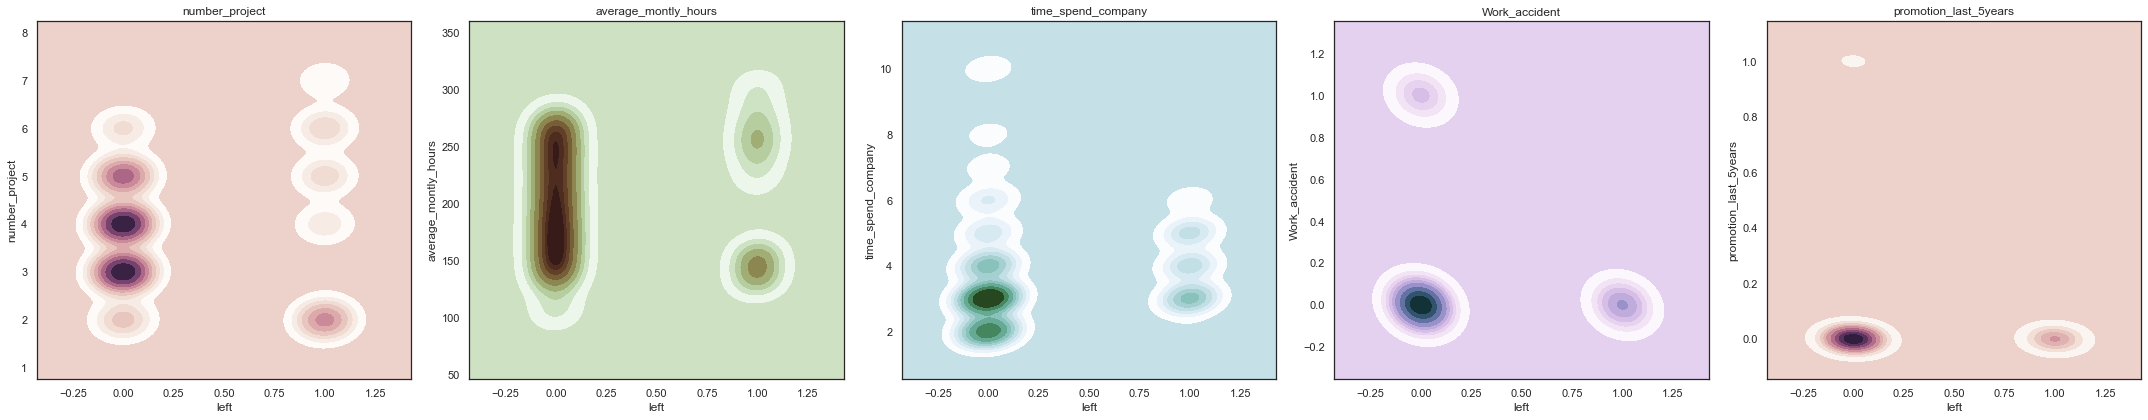

In [380]:
numerical_features = ['number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']
s = np.linspace(0, 3, 5)

# Plotting the KDEplots
f, axes = plt.subplots(1, 5, figsize=(30, 6), sharex=False, sharey=False)

for index, feature in enumerate(numerical_features):
    # Defining our colormap scheme
    cmap = sns.cubehelix_palette(start=s[index], light=1, gamma=1.2, as_cmap=True)
    # Generate and plot
    display_kdeplot(hr_df, 'left', feature, cmap, index)

f.tight_layout()

### Observations
- We observe that leavers thend to have either high working hours our low working hours
- Similarly, leavers have either one project or rather a high number of them
- Most leavers have had no promotion in the last 5 years
- Leavers tend not to have had accident
- Leavers tend to have higher length of service with the company

### Let's add a couple more features coming from the employee satisfaction survey
- these 2 features provide information on the employees' motivation and performance assessement

In [10]:
dirname = r'../datascienceforbusiness-master/'
emp_satis_eval = pd.read_excel (dirname+'employee_satisfaction_evaluation.xlsx') 
emp_satis_eval.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


- Let's join these 2 new features with the main dataset using the employee id key (unique identifier)
- we then drop the employee id number which will not be useful for our modelisation and classification task

In [27]:
df = hr_df.set_index('employee_id').join(emp_satis_eval.set_index('EMPLOYEE #'))
df.reset_index(inplace=True)
df.drop(['employee_id'], axis=1, inplace=True)
df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52
...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,support,low,0.40,0.57
14995,2,160,3,0,1,0,support,low,0.37,0.48
14996,2,143,3,0,1,0,support,low,0.37,0.53
14997,6,280,4,0,1,0,support,low,0.11,0.96


- not all evaluations were available and there are a few employee records missing data

In [28]:
df.isnull().sum()

number_project            0
average_montly_hours      0
time_spend_company        0
Work_accident             0
left                      0
promotion_last_5years     0
department                0
salary                    0
satisfaction_level       27
last_evaluation          27
dtype: int64

- we will fill the missing data with the average. This seems reasonable given the limited missing data sample.
- we will fill missing satisfaction level with the employees' average satisfaction, same with the evaluation score

In [29]:
df.describe()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
df.fillna(df.mean(), inplace=True)

In [394]:
df.isnull().sum()

number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
satisfaction_level       0
last_evaluation          0
dtype: int64

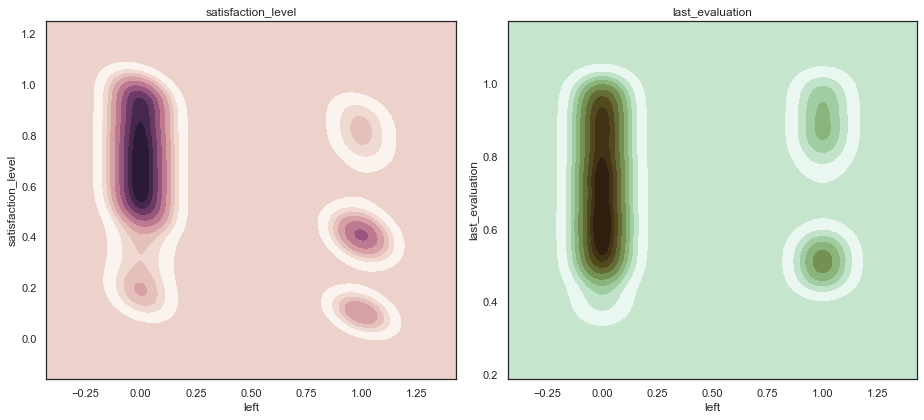

In [384]:
numerical_features = ['satisfaction_level', 'last_evaluation']
s = np.linspace(0, 1, 2)

# Plotting the KDEplots
f, axes = plt.subplots(1, 2, figsize=(13, 6), sharex=False, sharey=False)

for index, feature in enumerate(numerical_features):
    # Defining our colormap scheme
    cmap = sns.cubehelix_palette(start=s[index], light=1, gamma=1.2, as_cmap=True)
    # Generate and plot
    display_kdeplot(df, 'left', feature, cmap, index)

f.tight_layout()

### Observations
- we observe that the leavers tend to be less satisfied than the rest of the employees
- the leavers demonstrate either low evaluation performance or high evaluation
- This seems quite logical and we can assume two groups in the leavers population: the high performing, hard-working and the low-performing, unsatisfied, employees.

### Let's look at correlation

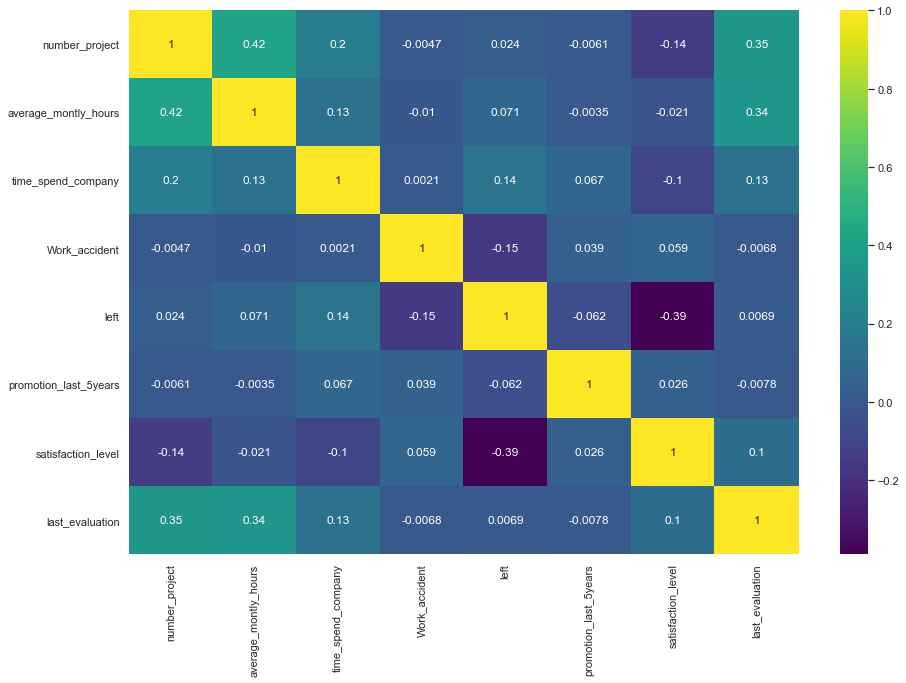

In [393]:
correlations = df.corr()
f, ax = plt.subplots(figsize=(15,10))
sns.heatmap(correlations, annot=True, cmap="viridis")
plt.show()

### Observations
- Logically, working hours and number of projects are correlated. The evaluation score seems also correlated with these two demonstrating hard-working behavior
- the satisfaction level shows negative correlation for the leavers which is logical. We also see that the satisfaction level is negatively correlated with the workload
- Last, it seems the satisfaction deteriorates with the length of service

- the dataset is skewed with less leavers in the total sample population

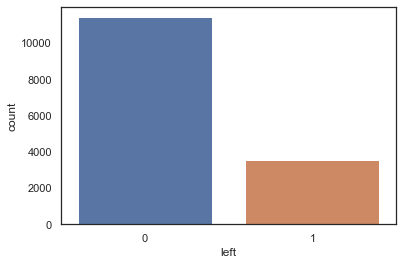

In [447]:
sns.countplot( x=y)
plt.show()

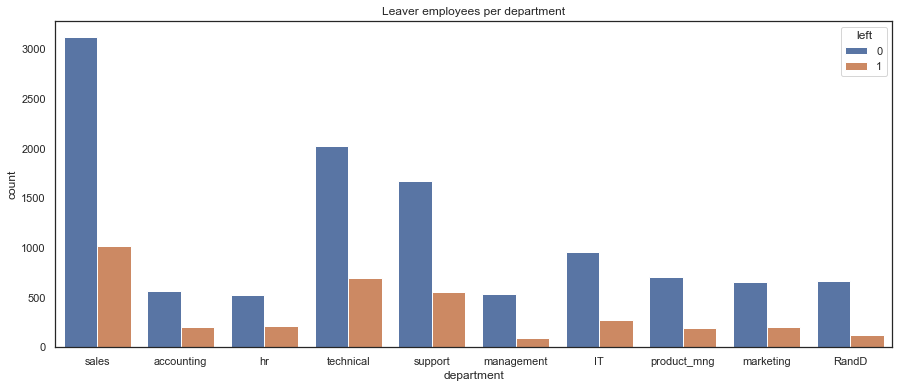

In [463]:
plt.figure(figsize=(15,6))
sns.countplot(x=df.department, hue=df.left, )
plt.title('Leaver employees per department')
plt.show()

### Let's transform the categorical features into one-hot vectors
- we drop the first dummy variable since the situation can be described with the remaining vectors. This also avoid correlation between the dummy variables

In [36]:
final_df = pd.get_dummies(data=df, columns=categorical_columns.columns, drop_first=True)
final_df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,0,1,0,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,0,1,0,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,0,1,0,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,0,1,0,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,0,1,0,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,0.40,0.57,0,0,0,0,0,0,0,1,0,1,0
14995,2,160,3,0,1,0,0.37,0.48,0,0,0,0,0,0,0,1,0,1,0
14996,2,143,3,0,1,0,0.37,0.53,0,0,0,0,0,0,0,1,0,1,0
14997,6,280,4,0,1,0,0.11,0.96,0,0,0,0,0,0,0,1,0,1,0


In [258]:
y = final_df.left
x = final_df.drop(['left'], axis=1)

# Prepare training data
- we split our dataset into 75% train, 25% test

In [397]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.25, shuffle=True, random_state=0)

In [398]:
X_train

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
5150,3,184,3,1,0,0.92,0.88,0,0,0,0,0,0,0,0,1,1,0
13288,4,150,2,0,0,0.97,0.57,0,0,0,0,0,0,0,0,0,0,1
8,5,224,5,0,0,0.89,1.00,0,0,0,0,0,0,1,0,0,1,0
1832,4,252,5,0,0,0.82,0.92,0,0,0,0,1,0,0,0,0,0,1
13827,3,158,8,1,0,0.62,0.40,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,3,270,3,0,0,0.52,0.57,1,0,0,0,0,0,0,0,0,1,0
3264,4,209,2,0,0,0.59,0.79,0,0,0,0,0,0,0,0,1,0,1
9845,5,259,2,0,0,0.69,0.94,0,0,0,0,0,0,0,0,0,0,1
10799,5,236,3,0,0,0.78,0.59,0,0,0,0,0,0,0,0,1,0,0


In [399]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

### Let's normalize the data (centering around mean and standard deviation equals to 1)
- y already 0 or 1

In [400]:
x_train_normalized = pd.DataFrame(x_train, columns=X_train.columns)
x_train_normalized

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,-0.650850,-0.341829,-0.342044,2.419704,-0.144795,1.239425,0.953258,-0.236740,-0.23231,-0.229319,-0.210432,-0.247844,-0.253652,-0.613895,-0.416659,2.124668,1.023660,-0.86807
1,0.157431,-1.022834,-1.031218,-0.413274,-0.144795,1.441248,-0.863072,-0.236740,-0.23231,-0.229319,-0.210432,-0.247844,-0.253652,-0.613895,-0.416659,-0.470662,-0.976887,1.15198
2,0.965712,0.459353,1.036303,-0.413274,-0.144795,1.118332,1.656354,-0.236740,-0.23231,-0.229319,-0.210432,-0.247844,-0.253652,1.628944,-0.416659,-0.470662,1.023660,-0.86807
3,0.157431,1.020181,1.036303,-0.413274,-0.144795,0.835780,1.187623,-0.236740,-0.23231,-0.229319,-0.210432,4.034795,-0.253652,-0.613895,-0.416659,-0.470662,-0.976887,1.15198
4,-0.650850,-0.862597,3.103823,2.419704,-0.144795,0.028489,-1.859125,-0.236740,-0.23231,-0.229319,-0.210432,4.034795,-0.253652,-0.613895,-0.416659,-0.470662,1.023660,-0.86807
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11244,-0.650850,1.380713,-0.342044,-0.413274,-0.144795,-0.375157,-0.863072,4.224044,-0.23231,-0.229319,-0.210432,-0.247844,-0.253652,-0.613895,-0.416659,-0.470662,1.023660,-0.86807
11245,0.157431,0.158910,-1.031218,-0.413274,-0.144795,-0.092605,0.425936,-0.236740,-0.23231,-0.229319,-0.210432,-0.247844,-0.253652,-0.613895,-0.416659,2.124668,-0.976887,1.15198
11246,0.965712,1.160388,-1.031218,-0.413274,-0.144795,0.311040,1.304806,-0.236740,-0.23231,-0.229319,-0.210432,-0.247844,-0.253652,-0.613895,-0.416659,-0.470662,-0.976887,1.15198
11247,0.965712,0.699708,-0.342044,-0.413274,-0.144795,0.674322,-0.745890,-0.236740,-0.23231,-0.229319,-0.210432,-0.247844,-0.253652,-0.613895,-0.416659,2.124668,-0.976887,-0.86807


In [401]:
x_test_normalized = pd.DataFrame(x_test, columns=X_test.columns)

# TRAIN CLASSIFICATION MODEL: Top Binary Classification Algorithms
- https://medium.com/@alex.ortner.1982/top-10-binary-classification-algorithms-a-beginners-guide-feeacbd7a3e2
- we will test various classifier using sklearn package
- the objective is to train a model to predict if an employee, based on the observed features, will likely quit. This can allow to detect risks early on
- we will explore various classifiers and identify best performing ones

### Logistic Regression
- relatively weak performance with less than 79% test accuracy

In [403]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train_normalized, y_train)

LogisticRegression(max_iter=1000)

In [404]:
print("score on test: " + str(lr.score(x_test_normalized, y_test)))
print("score on train: "+ str(lr.score(x_train_normalized, y_train)))

score on test: 0.7877333333333333
score on train: 0.7913592319317273


In [420]:
def display_confusion_matrix(cm):
    f, ax = plt.subplots(figsize=(4,3))
    sns.heatmap(cm, annot=True,cmap='viridis', fmt='d', linewidths=.5, annot_kws={"fontsize":15})  #fmt = '.2f' 2 digits after comma #if normalize else fmt ='d' to show integers, cmap='RdYlGn',"YlGnBu"
    plt.xlabel('Predicted outcome', fontsize = 15) # x-axis label with fontsize 15
    ax.xaxis.set_ticklabels(['Stay', 'Leave'])
    plt.ylabel('True outcome', fontsize = 15) # y-axis label with fontsize 15
    ax.yaxis.set_ticklabels(['Stay', 'Leave'])
    plt.title('Confusion matrix', fontsize = 20)

Accuracy 78.77%

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2881
           1       0.57      0.34      0.43       869

    accuracy                           0.79      3750
   macro avg       0.70      0.63      0.65      3750
weighted avg       0.76      0.79      0.77      3750



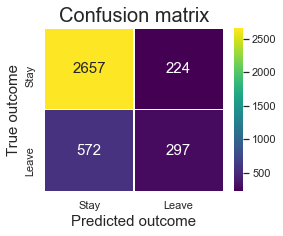

In [421]:
predictions = lr.predict(x_test_normalized)

print("Accuracy {0:.2f}%".format(100*accuracy_score(y_test, predictions)))
print()
cm = confusion_matrix(y_true = y_test, y_pred = predictions, labels=[0, 1])
display_confusion_matrix(cm)
print(classification_report(y_test, predictions))

### Support Vector machine (SVM)
- similar level of mediocre performance

In [477]:
from sklearn.svm import LinearSVC
svm=LinearSVC(C=0.0001)
svm.fit(x_train_normalized, y_train)
print("score on test: " + str(svm.score(x_test_normalized, y_test)))
print("score on train: "+ str(svm.score(x_train_normalized, y_train)))

score on test: 0.7784
score on train: 0.7750022224197707


### Gradient Boosting
- Significantly improved performance with 98% accuracy and balanced f1-score
- the model is able to perform similarly on leavers and non leavers
- No sign of overfitting

In [481]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [482]:
xg = GradientBoostingClassifier()
xg.fit(x_train, y_train)

GradientBoostingClassifier()

In [483]:
print("score on test: " + str(xg.score(x_test_normalized, y_test)))
print("score on train: "+ str(xg.score(x_train_normalized, y_train)))

score on test: 0.9765333333333334
score on train: 0.9759089696861943


Accuracy 97.65%

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2881
           1       0.97      0.93      0.95       869

    accuracy                           0.98      3750
   macro avg       0.97      0.96      0.97      3750
weighted avg       0.98      0.98      0.98      3750



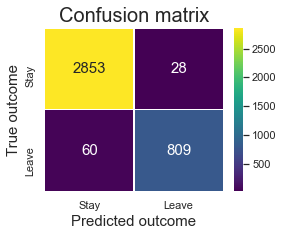

In [484]:
predictions = xg.predict(x_test_normalized)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print()
cm = confusion_matrix(y_true = y_test, y_pred = predictions, labels=[0, 1])
display_confusion_matrix(cm)
print(classification_report(y_test, predictions))

### Decision Tree
- very strong performance with 98% accuracy
- It seems to perform better than gradient boosting with less false negative (true leavers not detected) which is probably the most important issue. Indeed, a company would like to detect potential leavers and false negative could be quite detrimental
- Sign of overfitting since we obtain a 100% accuracy on the train set

In [485]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train_normalized, y_train)
print("score on test: "  + str(clf.score(x_test_normalized, y_test)))
print("score on train: " + str(clf.score(x_train_normalized, y_train)))

score on test: 0.9786666666666667
score on train: 1.0


Accuracy 97.87%

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2881
           1       0.94      0.97      0.95       869

    accuracy                           0.98      3750
   macro avg       0.97      0.98      0.97      3750
weighted avg       0.98      0.98      0.98      3750



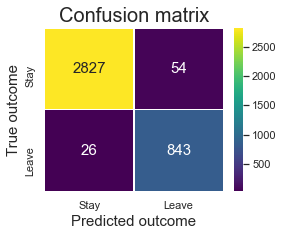

In [486]:
predictions = clf.predict(x_test_normalized)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print()
cm = confusion_matrix(y_true = y_test, y_pred = predictions, labels=[0, 1])
display_confusion_matrix(cm)
print(classification_report(y_test, predictions))

### Bagging Decision Tree
- Improved version from simple Decision Tree using an Ensemble approach with reduced overfitting
- very strong performance slightly above Gradient Boosting (less false negative, false positive)

In [492]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# max_samples: maximum size 0.5=50% of each sample taken from the full dataset
# max_features: maximum of features 1=100% taken here all 10K 
# n_estimators: number of decision trees 
bg = BaggingClassifier(DecisionTreeClassifier(),max_samples=0.5,max_features=1.0,n_estimators=10)
bg.fit(x_train_normalized, y_train)
print("score on test: " + str(bg.score(x_test_normalized, y_test)))
print("score on train: "+ str(bg.score(x_train_normalized, y_train)))

score on test: 0.9826666666666667
score on train: 0.99164370166237


Accuracy 98.27%
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2881
           1       0.98      0.94      0.96       869

    accuracy                           0.98      3750
   macro avg       0.98      0.97      0.98      3750
weighted avg       0.98      0.98      0.98      3750



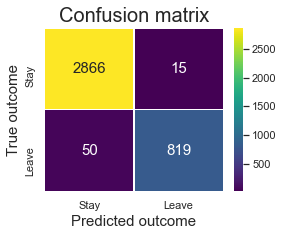

In [493]:
predictions = bg.predict(x_test_normalized)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
cm = confusion_matrix(y_true = y_test, y_pred = predictions, labels=[0, 1])
display_confusion_matrix(cm)
print(classification_report(y_test, predictions))

### AdaBoost
- not showing real benefit over previous best models (Gradient Boosting and Bagging Decision Tree)

In [495]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adb = AdaBoostClassifier(DecisionTreeClassifier(min_samples_split=10,max_depth=4),n_estimators=10,learning_rate=0.6)
adb.fit(x_train_normalized, y_train)
print("score on test: " + str(adb.score(x_test_normalized, y_test)))
print("score on train: "+ str(adb.score(x_train_normalized, y_train)))

score on test: 0.976
score on train: 0.9783980798293181


Accuracy 97.60%

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2881
           1       0.97      0.93      0.95       869

    accuracy                           0.98      3750
   macro avg       0.97      0.96      0.97      3750
weighted avg       0.98      0.98      0.98      3750



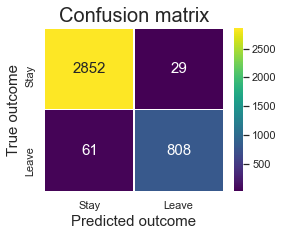

In [496]:
predictions = adb.predict(x_test_normalized)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print()
cm = confusion_matrix(y_true = y_test, y_pred = predictions, labels=[0, 1])
display_confusion_matrix(cm)
print(classification_report(y_test, predictions))

### Random Forest
- the level of false negative is increasing. This can be problematic

In [497]:
from sklearn.ensemble import RandomForestClassifier
# n_estimators = number of decision trees
rf = RandomForestClassifier(n_estimators=30, max_depth=9)
rf.fit(x_train_normalized, y_train)
print("score on test: " + str(rf.score(x_test_normalized, y_test)))
print("score on train: "+ str(rf.score(x_train_normalized, y_train)))

score on test: 0.9770666666666666
score on train: 0.9794648413192284


Accuracy 97.71%

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2881
           1       0.98      0.92      0.95       869

    accuracy                           0.98      3750
   macro avg       0.98      0.96      0.97      3750
weighted avg       0.98      0.98      0.98      3750



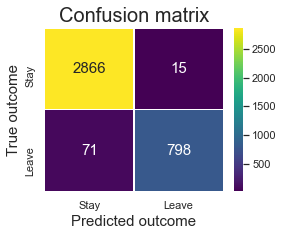

In [499]:
predictions = rf.predict(x_test_normalized)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print()
cm = confusion_matrix(y_true = y_test, y_pred = predictions, labels=[0, 1])
display_confusion_matrix(cm)
print(classification_report(y_test, predictions))

### XGBoost
- https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/
- https://towardsdatascience.com/getting-started-with-xgboost-in-scikit-learn-f69f5f470a97
- Best performance achieved so far with 99% accuracy
- Recall and precision quite even with strong performance on false negative

In [500]:
import xgboost; print(xgboost.__version__)
#from xgboost import XGBRegressor                           # for prediction
from xgboost import XGBClassifier                           # for classification  - sklearn wrapper for XGBoost
from xgboost import plot_importance
from sklearn.model_selection import cross_val_score
cross_val_score(XGBClassifier(use_label_encoder=False), x_train_normalized, y_train)

1.4.2
[10:10:53] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:53] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:54] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:10:54] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluat

array([0.98311111, 0.98711111, 0.98711111, 0.98666667, 0.98399289])

[10:12:03] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy 98.83%

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2881
           1       0.98      0.97      0.97       869

    accuracy                           0.99      3750
   macro avg       0.99      0.98      0.98      3750
weighted avg       0.99      0.99      0.99      3750



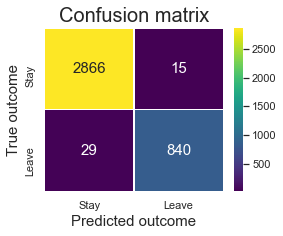

In [502]:
xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(x_train_normalized, y_train, ) #eval_metric='auc'

predictions = xgb.predict(x_test_normalized)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print()
cm = confusion_matrix(y_true = y_test, y_pred = predictions, labels=[0, 1])
display_confusion_matrix(cm)
print(classification_report(y_test, predictions))

### XGBoost most important features

In [507]:
from sklearn import metrics   #Additional scklearn functions
from sklearn.model_selection import GridSearchCV   #Perforing grid search

def modelfit(alg, x, y, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    ''' if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(x, label=y)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds, show_progress=False)
        alg.set_params(n_estimators=cvresult.shape[0])'''
    
    #Fit the algorithm on the data
    alg.fit(x, y, eval_metric='auc')
        
    #Predict training set:
    predictions = alg.predict(x)
    predprob = alg.predict_proba(x)[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y, predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y, predprob))
                    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    features_by_importance = feat_imp.index.values
    feat_imp.plot(kind='bar', title='Feature Importances')
    plt.ylabel('Feature Importance Score')
    
    return alg, features_by_importance


Model Report
Accuracy : 1
AUC Score (Train): 1.000000


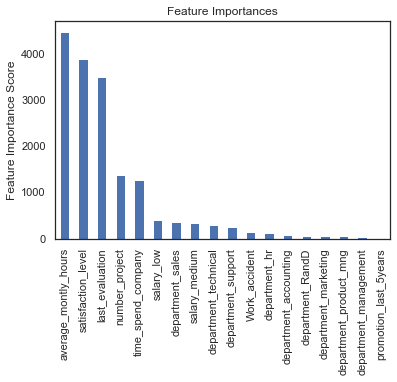

In [508]:
xgb  = XGBClassifier(   learning_rate =0.1,
                         n_estimators=1000,
                         max_depth=5,
                         min_child_weight=1,
                         gamma=0,
                         subsample=0.8,
                         colsample_bytree=0.8,
                         objective= 'binary:logistic',
                         nthread=4,
                         scale_pos_weight=1,
                         seed=27,
                         use_label_encoder=False)

xgb, features_by_importance = modelfit(xgb, x_train_normalized, y_train)

### MOST IMPORTANT FEATURES FOR LEAVERS DETERMINATION
- average hours (complemented by number of projects) which is a proxy of the workload
- satisfaction level comes second
- performance evaluation is the top 3 driver

These are consistent with our observations whenn looking at the corelations earlier.
These are specific to the dataset and can obviously be enriched using additional features

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

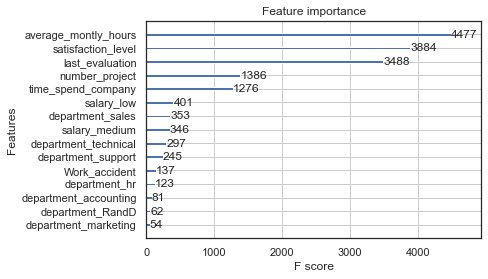

In [509]:
plot_importance(xgb, max_num_features = 15)

In [279]:
sorted_idx = np.argsort(xgb.feature_importances_)[::-1]   # xgb.feature_importances_ IS BROKEN
sorted_idx

array([ 2,  5,  0,  6,  1,  3,  4, 16, 12,  8, 15,  9, 10, 17, 14,  7, 13,
       11], dtype=int64)

In [285]:
xgb.get_booster().get_score(importance_type="gain")  # other type: 'gain'

{'satisfaction_level': 5.9288683689214245,
 'number_project': 4.972303019753393,
 'last_evaluation': 2.0947981481518383,
 'average_montly_hours': 2.0674754660660075,
 'department_technical': 0.8658375245616385,
 'time_spend_company': 8.830256625109834,
 'department_support': 0.7397918982633335,
 'department_accounting': 0.8707307551277103,
 'salary_medium': 0.7516609552898439,
 'salary_low': 0.9227953438602563,
 'department_product_mng': 0.9222774568254545,
 'department_RandD': 0.7227057159772151,
 'department_sales': 0.6529109205411289,
 'Work_accident': 1.9541965496397247,
 'department_hr': 0.7547065027133334,
 'department_management': 0.7521275282539999,
 'department_marketing': 0.339062974940845,
 'promotion_last_5years': 1.337980698642857}

Accuracy 98.80%

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2881
           1       0.98      0.97      0.97       869

    accuracy                           0.99      3750
   macro avg       0.98      0.98      0.98      3750
weighted avg       0.99      0.99      0.99      3750



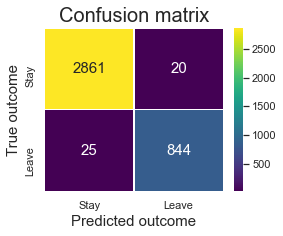

In [511]:
predictions = xgb.predict(x_test_normalized)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print()
cm = confusion_matrix(y_true = y_test, y_pred = predictions, labels=[0, 1])
display_confusion_matrix(cm)
print(classification_report(y_test, predictions))

In [113]:
dir(xgb)

['_Booster',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_can_use_inplace_predict',
 '_check_n_features',
 '_configure_fit',
 '_early_stopping_attr',
 '_estimator_type',
 '_get_iteration_range',
 '_get_param_names',
 '_get_tags',
 '_get_type',
 '_le',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_set_evaluation_result',
 '_validate_data',
 'apply',
 'base_score',
 'best_iteration',
 'best_ntree_limit',
 'best_score',
 'booster',
 'classes_',
 'coef_',
 'colsample_bylevel',
 'colsample_bynode',
 'colsample_bytree',
 'evals_result',
 'feature_importances_',
 'fit',
 'gamma',
 'get_booster',
 'get_num_b

In [513]:
import plotly
import plotly.graph_objects as go
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [515]:
# Scatter plot 
trace = go.Scatter(
    y = list(xgb.get_booster().get_score(importance_type="weight").values()),                     # BROKEN xgb.feature_importances_,
    x = features_by_importance,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 13,
        #size= rf.feature_importances_,
        #color = np.random.randn(500), #set color equal to a variable
        color = list(xgb.get_booster().get_score(importance_type="weight").values()),      # BROKEN  xgb.feature_importances_,
        colorscale='Portland',
        showscale=True
    ),
    #text = x.columns.values
)
data = [trace]

layout= go.Layout(
    autosize= True,
    title= 'XGBoost Feature Importance',
    hovermode= 'closest',
     xaxis= dict(
         ticklen= 5,
         showgrid=False,
        zeroline=False,
        showline=False
     ),
    yaxis=dict(
        title= 'Feature Importance',
        showgrid=False,
        zeroline=False,
        ticklen= 5,
        gridwidth= 2
    ),
    width=800,
    showlegend= False
)
fig = go.Figure(data=data, layout=layout)
#fig.show()
py.iplot(fig,filename='scatterHR')

# WRAP UP

## Voting Classifier

In [548]:
from sklearn.ensemble import VotingClassifier
# 1) xg boost = xgb
# 2) bagging classifier = bg
# 3) Gradient Boosting = xg
# 4) Decision Tree = clf
evc = VotingClassifier(estimators=[('DecisionTree',clf),('gradient boosting',xg),('XGBoost',xgb)],voting='hard')
evc.fit(x_train_normalized, y_train)
print("score on test: " + str(evc.score(x_test_normalized, y_test)))
print("score on train: "+ str(evc.score(x_train_normalized, y_train)))

[10:48:44] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
score on test: 0.9917333333333334
score on train: 1.0


Accuracy 99.17%

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2881
           1       0.99      0.98      0.98       869

    accuracy                           0.99      3750
   macro avg       0.99      0.99      0.99      3750
weighted avg       0.99      0.99      0.99      3750



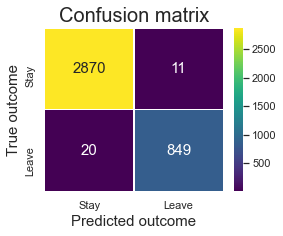

In [549]:
predictions = evc.predict(x_test_normalized)

print("Accuracy {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print()
cm = confusion_matrix(y_true = y_test, y_pred = predictions, labels=[0, 1])
display_confusion_matrix(cm)
print(classification_report(y_test, predictions))

### Simulation
- Let's take an average profile
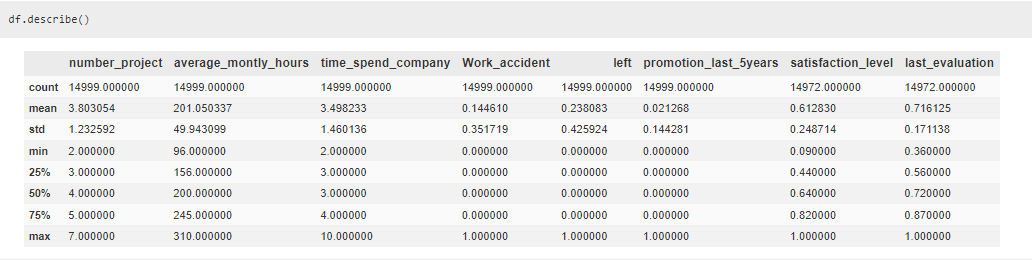

In [626]:
print(x.columns)
JohnDoe = [4, 201, 3.5, 0, 0, 0.6, 0.7, 0,0,0,0,0,0,1,0,0,1,0 ]
assert len(JohnDoe) == len(x.columns)

Index(['number_project', 'average_montly_hours', 'time_spend_company',
       'Work_accident', 'promotion_last_5years', 'satisfaction_level',
       'last_evaluation', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_support',
       'department_technical', 'salary_low', 'salary_medium'],
      dtype='object')


In [627]:
JohnDoe = pd.DataFrame.from_dict(data={feat:[score] for feat, score in zip(x.columns, JohnDoe)})
JohnDoe

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,4,201,3.5,0,0,0.6,0.7,0,0,0,0,0,0,1,0,0,1,0


In [628]:
if evc.predict(sc.transform(JohnDoe)).item():
    print('leaver')
else:
    print('stayer')

stayer


- Let's take a strong performer with high workload

In [625]:
JohnDoe = [5, 245, 2, 0, 0, 0.82, 0.87, 0,0,0,0,0,0,1,0,0,1,0 ]
JohnDoe = pd.DataFrame.from_dict(data={feat:[score] for feat, score in zip(x.columns, JohnDoe)})
if evc.predict(sc.transform(JohnDoe)).item():
    print('leaver')
else:
    print('stayer')

stayer


- Let's decrease a bit the satisfaction level and increase workload

In [624]:
JohnDoe = [7, 262, 2, 0, 0, 0.41, 0.87, 0,0,0,0,0,0,1,0,0,1,0 ]
JohnDoe = pd.DataFrame.from_dict(data={feat:[score] for feat, score in zip(x.columns, JohnDoe)})
if evc.predict(sc.transform(JohnDoe)).item():
    print('leaver')
else:
    print('stayer')

leaver


In [606]:
df[df.left==1].describe()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.0,3571.000000,3571.000000,3571.000000
mean,3.855503,207.419210,3.876505,0.047326,1.0,0.005321,0.440234,0.718228
std,1.818165,61.202825,0.977698,0.212364,0.0,0.072759,0.263588,0.197256
min,2.000000,126.000000,2.000000,0.000000,1.0,0.000000,0.090000,0.450000
25%,2.000000,146.000000,3.000000,0.000000,1.0,0.000000,0.130000,0.520000
50%,4.000000,224.000000,4.000000,0.000000,1.0,0.000000,0.410000,0.780000
75%,6.000000,262.000000,5.000000,0.000000,1.0,0.000000,0.725000,0.900000
max,7.000000,310.000000,6.000000,1.000000,1.0,1.000000,0.920000,1.000000
